In [21]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
# from sklearn.feature_extraction.image import extract_patches_2d 
from skimage.util import view_as_windows
from skimage import io

image = io.imread('HW4_Q3.png')
img_array = np.array(image)[:250, :410, :]
print(img_array.shape)


(250, 410, 4)


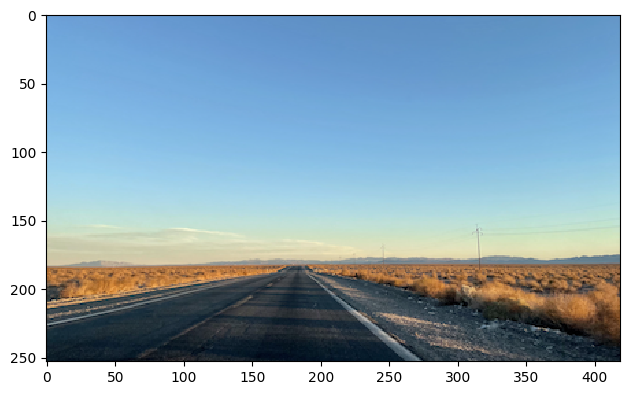

In [22]:
io.imshow(image)

In [70]:
patch_size = (10, 10, 3)

# Extract patches with the same stride size as the patch size
patches = view_as_windows(image, patch_size, step=patch_size)
print(patches.shape)
# Reshape the patches to get a 2D array
patches = patches.reshape(-1, np.prod(patch_size))
print(patches.shape)

(25, 41, 1, 10, 10, 3)
(1025, 300)


In [152]:
import networkx as nx
import scipy.spatial.distance as distance

# Compute pairwise distances between patches using Gaussian kernel
sigma = 2.  # Adjust the value of sigma as needed
patch_distances = distance.pdist(patches, metric='euclidean')
patch_distances = distance.squareform(patch_distances)
patch_weights = np.exp(-patch_distances / (2 * sigma ** 2))
median_weight = np.median(patch_weights)
patch_weights[patch_weights < median_weight] = 0
# Create a graph
G = nx.Graph()

# Add nodes to the graph
num_patches = len(patches)
G.add_nodes_from(range(num_patches))

# Add edges to the graph based on patch distances
for i in range(num_patches):
    for j in range(i + 1, num_patches):
        # weight = np.linalg.norm(patches[i] - patches[j])
        if weight > 0:
            G.add_edge(i, j, weight=patch_weights[i,j])


In [153]:
laplacian_matrix = nx.laplacian_matrix(G).toarray() 

# Compute eigenvalues and eigenvectors of the Laplacian matrix
eigenvalues, eigenvectors = np.linalg.eig(laplacian_matrix)

# Sort the eigenvectors by increasing order of eigenvalues
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Take the first 4 eigenvectors
first_4_eigenvectors = sorted_eigenvectors[:, :4]
first_4_eigenvectors = first_4_eigenvectors.real


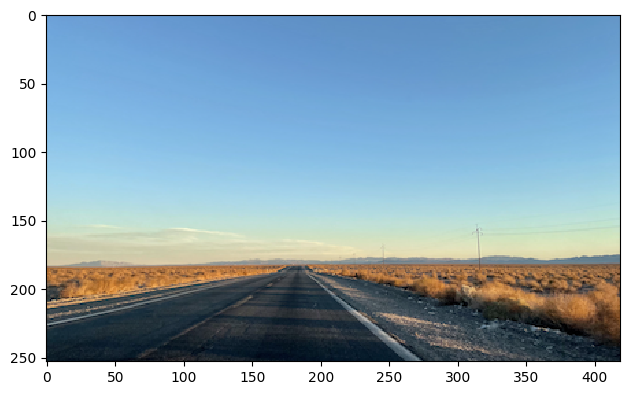

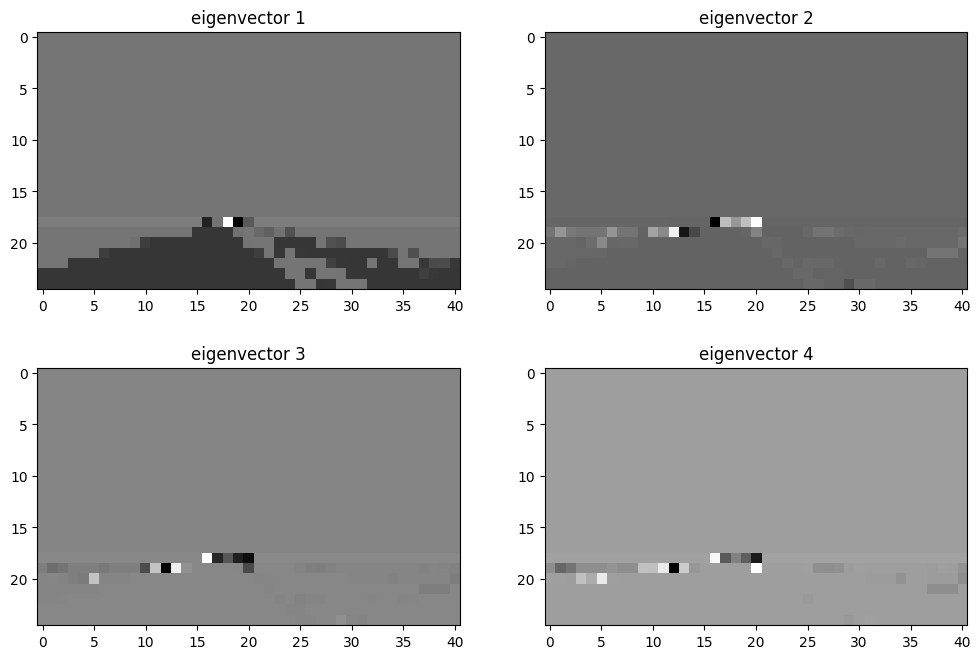

In [158]:
io.imshow(image)
plt.savefig('original.png')
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow((first_4_eigenvectors[:, i]/np.linalg.norm(first_4_eigenvectors[:, i])).reshape(img_array.shape[0]//patch_size[0], img_array.shape[1]//patch_size[1] ), cmap='gray')
    plt.title('eigenvector {}'.format(i + 1))
plt.savefig('eigenvectors.png')

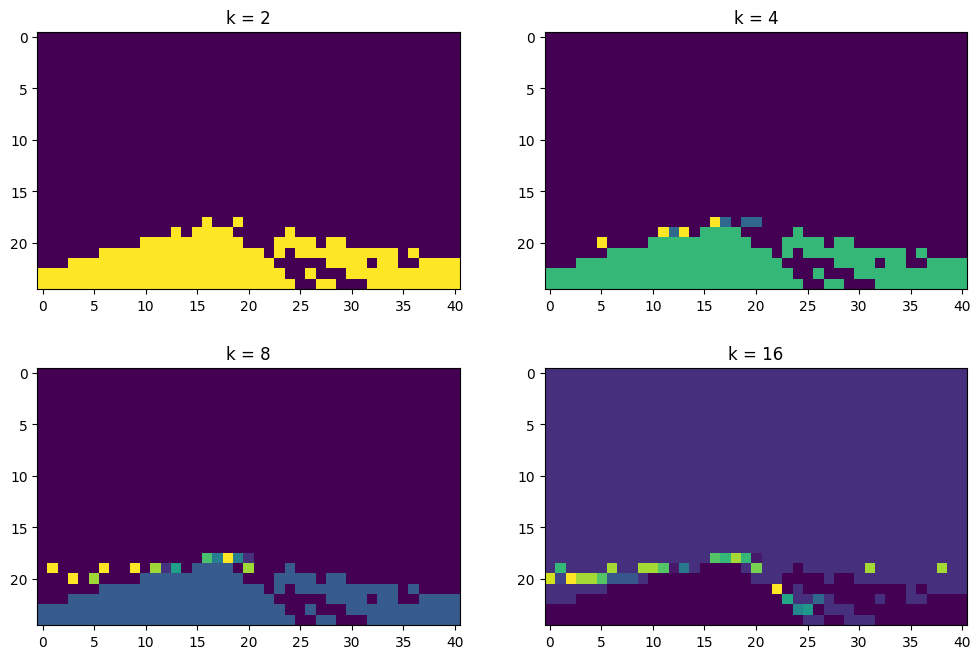

In [157]:

# Compute the k-means clustering of the eigenvectors
from sklearn.cluster import KMeans
plt.figure(figsize=(12, 8))
for i,k in enumerate([2,4,8,16]) :
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=100).fit(sorted_eigenvectors[:,:k].real)
    labels = kmeans.labels_
    plt.subplot(2, 2, i + 1)
    plt.imshow(labels.reshape(img_array.shape[0]//patch_size[0], img_array.shape[1]//patch_size[1]), )
    plt.title('k = {}'.format(k))
plt.savefig('kmeans.png')
plt.show()